<a href="https://colab.research.google.com/github/Khaleb5190/tanstack-template/blob/main/Synthetic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import numpy as np
import pandas as pd

from google.colab import files
uploads=files.upload()

Saving synthetic_fraud_dataset.csv to synthetic_fraud_dataset.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# read the data
df=pd.read_csv("synthetic_fraud_dataset.csv")
df


,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0
...,...,...,...,...,...,...,...,...,...,...
9995,1076,482,58.366442,POS,Clothing,DE,12,0.066366,0.086344,0
9996,4995,904,139.502160,POS,Travel,DE,13,0.119014,0.285680,0
9997,3485,527,71.012122,Online,Travel,TR,8,0.119204,0.262262,0
9998,7922,771,21.031405,QR,Grocery,UK,12,0.027088,0.295243,0


In [ ]:
# data inspecting
# first 5 rows
df.head()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
0,9608,363,4922.587542,ATM,Travel,TR,12,0.992347,0.947908,1
1,456,692,48.018303,QR,Food,US,21,0.168571,0.224057,0
2,4747,587,136.881960,Online,Travel,TR,14,0.296127,0.125058,0
3,6934,445,80.534719,POS,Clothing,TR,23,0.124801,0.159243,0
4,1646,729,120.041158,Online,Grocery,FR,16,0.098129,0.027542,0


In [ ]:
# last 5 rows
df.tail()

,transaction_id,user_id,amount,transaction_type,merchant_category,country,hour,device_risk_score,ip_risk_score,is_fraud
9995,1076,482,58.366442,POS,Clothing,DE,12,0.066366,0.086344,0
9996,4995,904,139.502160,POS,Travel,DE,13,0.119014,0.285680,0
9997,3485,527,71.012122,Online,Travel,TR,8,0.119204,0.262262,0
9998,7922,771,21.031405,QR,Grocery,UK,12,0.027088,0.295243,0
9999,6451,429,54.028632,ATM,Electronics,DE,11,0.096438,0.042823,0


In [ ]:
# statistical description of the dataset
df.describe()

,transaction_id,user_id,amount,hour,device_risk_score,ip_risk_score,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,500.058700,178.142763,14.247100,0.183773,0.184669,0.050000
std,2886.89568,288.328495,531.647950,5.347383,0.177381,0.175772,0.217956
min,0.00000,0.000000,1.000000,0.000000,0.000030,0.000009,0.000000
25%,2499.75000,247.000000,65.084753,10.000000,0.075721,0.077762,0.000000
50%,4999.50000,503.000000,101.686510,14.000000,0.156583,0.158290,0.000000
75%,7499.25000,750.250000,138.280872,19.000000,0.234939,0.236968,0.000000
max,9999.00000,999.000000,11628.213881,23.000000,0.998737,0.999603,1.000000


In [ ]:
# datatypes in your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     10000 non-null  int64  
 1   user_id            10000 non-null  int64  
 2   amount             10000 non-null  float64
 3   transaction_type   10000 non-null  object 
 4   merchant_category  10000 non-null  object 
 5   country            10000 non-null  object 
 6   hour               10000 non-null  int64  
 7   device_risk_score  10000 non-null  float64
 8   ip_risk_score      10000 non-null  float64
 9   is_fraud           10000 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
# check null values
df.isnull().sum()

,0
transaction_id,0
user_id,0
amount,0
transaction_type,0
merchant_category,0
country,0
hour,0
device_risk_score,0
ip_risk_score,0
is_fraud,0


In [ ]:
# replacing int nulls with median (central value)
df["amount"]=df['amount'].fillna(df['amount'].median())
# replacing objects with most appearing value
df['country']=df['country'].fillna(df['country'].mode())

In [ ]:
# check count duplicates
duplicates=df.duplicated().sum()
print(duplicates)

0


In [ ]:
# Filter the countries with the highest fraud rate or Fraud > 1
fraud_by_country=df.groupby('country')['is_fraud'].sum().sort_values(ascending=False)
fraud_by_country_count=pd.DataFrame(fraud_by_country)
display(fraud_by_country_count)

,is_fraud
country,
NG,100
US,97
UK,85
TR,75
FR,74
DE,69


In [ ]:
# transaction_type with highest fraud cases
fraud_by_transaction=df.groupby('transaction_type')['is_fraud'].sum().sort_values(ascending=False)
fraud_by_transaction


,is_fraud
transaction_type,
ATM,138
Online,126
QR,120
POS,116


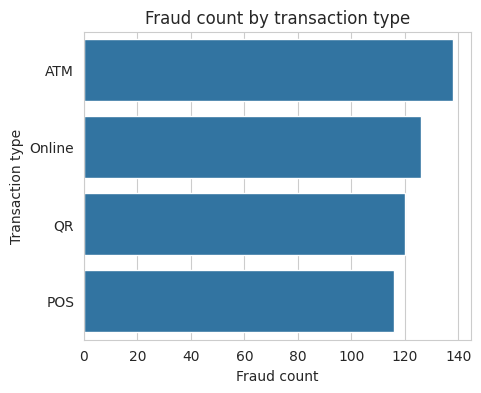

In [ ]:
# visualization
# set figure size
plt.figure(figsize=(5,4))
# chart type and feed x&y values
sns.barplot(x=fraud_by_transaction.values, y=fraud_by_transaction.index)
# Chart title
plt.title("Fraud count by transaction type")
# X axis lebel
plt.xlabel("Fraud count")
# X axis lebel
plt.ylabel("Transaction type")
# method to display chart
plt.show()